In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

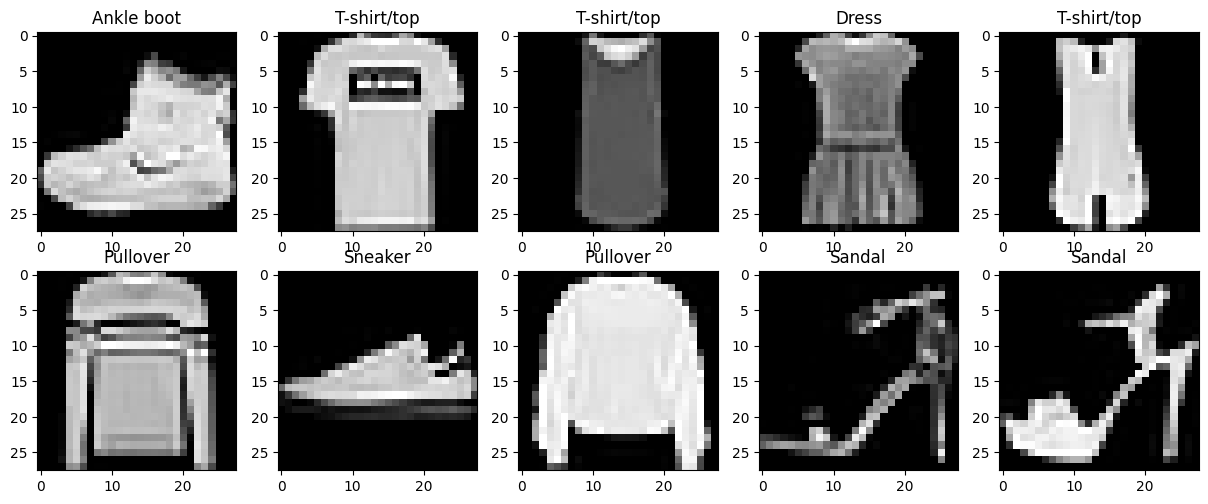

In [ ]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
plt.show()

In [ ]:
#DATA PREPARATION

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
y_train[2]

0

In [ ]:
y_train_ohe[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1).astype("float")
x_test = x_test.reshape(10000, 28, 28, 1).astype("float")

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
#MODEL BUILDING

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))   # If padding is valid, no padding. If padding is same, input size is equal to output size.
model.add(Activation("relu"))
# model.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))  # If you want to add more convolutional layers, repeat the same.
# model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))                                             # Default pool_size is (2,2)
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(x=x_train,
          y=y_train_ohe,
          batch_size=1000,
          validation_data=(x_test, y_test_ohe),
          epochs=30)

Epoch 1/30
60/60 [==============================] - 13s 203ms/step - loss: 29.8737 - accuracy: 0.4947 - val_loss: 9.7225 - val_accuracy: 0.6724
Epoch 2/30
60/60 [==============================] - 12s 206ms/step - loss: 7.1766 - accuracy: 0.7190 - val_loss: 5.8972 - val_accuracy: 0.7409
Epoch 3/30
60/60 [==============================] - 13s 215ms/step - loss: 4.7527 - accuracy: 0.7614 - val_loss: 4.4441 - val_accuracy: 0.7663
Epoch 4/30
60/60 [==============================] - 15s 249ms/step - loss: 3.6129 - accuracy: 0.7822 - val_loss: 3.5468 - val_accuracy: 0.7766
Epoch 5/30
60/60 [==============================] - 12s 206ms/step - loss: 2.9174 - accuracy: 0.7945 - val_loss: 2.9167 - val_accuracy: 0.7874
Epoch 6/30
60/60 [==============================] - 13s 212ms/step - loss: 2.4297 - accuracy: 0.8021 - val_loss: 2.5048 - val_accuracy: 0.7917
Epoch 7/30
60/60 [==============================] - 13s 216ms/step - loss: 2.0751 - accuracy: 0.8090 - val_loss: 2.2216 - val_accuracy: 0.794

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1000, 26, 26, 3)         30        
                                                                 
 activation (Activation)     (1000, 26, 26, 3)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (1000, 13, 13, 3)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (1000, 507)               0         
                                                                 
 dense (Dense)               (1000, 10)                5080      
                                                                 
Total params: 5,110
Trainable params: 5,110
Non-trainable params: 0
______________________________________________________

In [ ]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

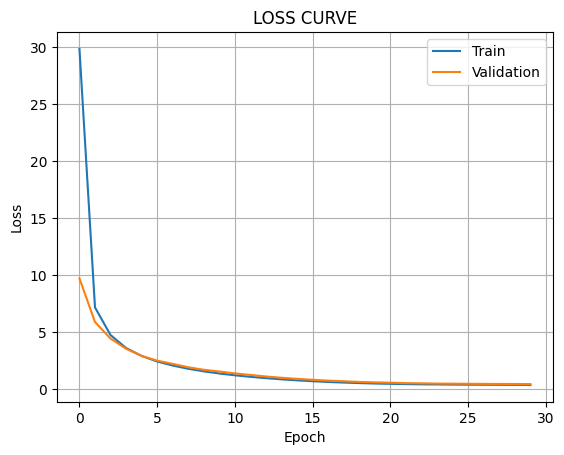

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

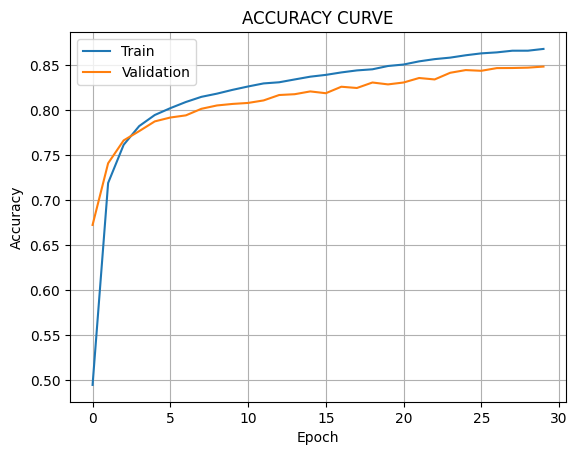

In [ ]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

In [ ]:
#PREDICTIONS

In [ ]:
import numpy as np

In [ ]:
preds = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


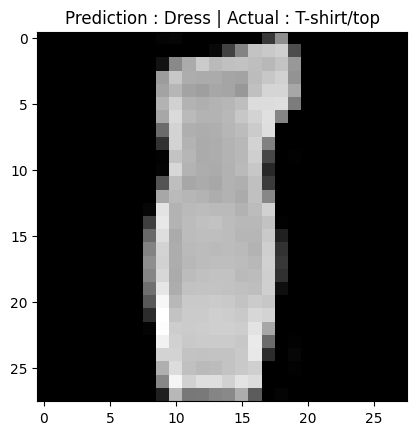

In [ ]:
n = 1111
plt.imshow(x_test[n].reshape(28,28), cmap="gray")
plt.title(f"Prediction : {class_names[np.argmax(preds[n])]} | Actual : {class_names[y_test[n]]}")
plt.show()